In [1]:
import os
from utils.RecommenderSystem import RecommenderSystem  
import pandas as pd
from unidecode import unidecode  
import torch 
from sklearn.cluster import KMeans, AgglomerativeClustering 
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    # Set the GPU device (assuming you have at least one GPU)
    gpu_device = 0  # You can change this to the index of the GPU you want to use
    torch.cuda.set_device(gpu_device)
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(gpu_device)}")
else:
    # If no GPU is available, use the CPU
    device = torch.device("cpu")
    print("No GPU available, using CPU")


Using GPU: NVIDIA GeForce RTX 3060


In [2]:
train_path = 'C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\marzo.csv'
test_path =  'C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\abril.csv'

train = pd.read_csv(train_path) 
test = pd.read_csv(test_path)

C:\Users\magda\AppData\Local\Temp\ipykernel_20876\1312065942.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying_users.rename(columns={'all users': 'qualifying users'}, inplace=True)


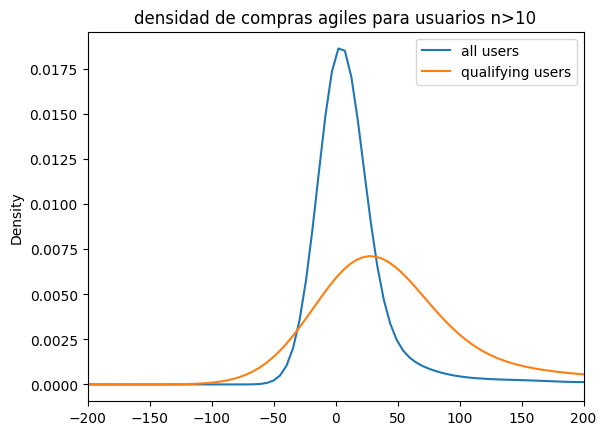

In [3]:
gb = train.groupby(by =['taxnumberprovider']).agg({'agilebuyingscode':'nunique'})
gb = gb.sort_values(by = 'agilebuyingscode')
gb.rename(columns={'agilebuyingscode': 'all users'}, inplace=True)

fig,ax = plt.subplots()
gb.plot.density(title = "densidad de compras agiles para todos los usuarios", ax = ax)
  
n_strings = 10
qualifying_users =  gb[gb['all users'] >= n_strings]
qualifying_users.rename(columns={'all users': 'qualifying users'}, inplace=True)

qualifying_users.plot.density(title = 'densidad de compras agiles para usuarios n>10',ax = ax, legend = True)
ax.set_xlim(-200, 200)
  
df = qualifying_users.reset_index() 

C:\Users\magda\AppData\Local\Temp\ipykernel_20876\4117253357.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying_users.rename(columns={'all users': 'qualifying users'}, inplace=True)


(-200.0, 200.0)

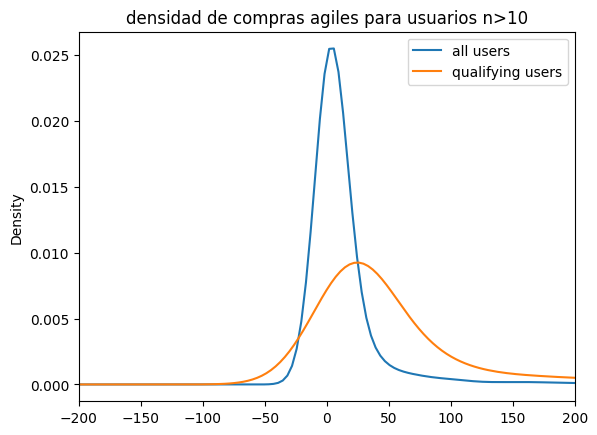

In [4]:
gb = test.groupby(by =['taxnumberprovider']).agg({'agilebuyingscode':'nunique'})
gb = gb.sort_values(by = 'agilebuyingscode')
gb.rename(columns={'agilebuyingscode': 'all users'}, inplace=True)

fig,ax = plt.subplots()
gb.plot.density(title = "densidad de compras agiles para todos los usuarios", ax = ax)
  
n_strings = 10
qualifying_users =  gb[gb['all users'] >= n_strings]
qualifying_users.rename(columns={'all users': 'qualifying users'}, inplace=True)

qualifying_users.plot.density(title = 'densidad de compras agiles para usuarios n>10',ax = ax, legend = True)
ax.set_xlim(-200, 200)

In [5]:
RS = RecommenderSystem(train,
                       test,
                       save_path = os.getcwd(),
                       initialize_from='C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\Modeling\\hito_4\\eval_userspace_data')

Initializing Recommender System
The current directory is c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\Modeling\hito_4
Using GPU: NVIDIA GeForce RTX 3060
Initializing User Space
Directory 'C:\Users\magda\OneDrive\Escritorio\MDS_licitalab\Modeling\hito_4\SAVEuserspace_data copy' created or already exists.
['BERT_model.pkl', 'BERT_tokenizer.pkl', 'kmeans_clusters.csv', 'kmeans_model.pkl', 'vectorized_corpus.csv']
Models and Dataframes not found, initializing a Recommender System from zero.
Error creating directory: 'RecommenderSystem' object has no attribute 'model_save_directory'
Generating User Space


KeyError: "['feature_vector'] not in index"